In [8]:
import sys, os
ds_path = os.path.join(os.curdir, 'codes')
sys.path.append(ds_path)
from dataset.mnist import load_mnist
from common.functions import *
from common.gradient import numerical_gradient


In [39]:
class TwoLayerNet:
    def __init__(self, 
    input_size, hidden_size, output_size,
    weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size) * weight_init_std
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, output_size) * weight_init_std
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] =  numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] =  numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [45]:
x = np.random.rand(100, 784) # 伪输入数据（100笔）
y = net.predict(x)
print(y)

[[0.10192721 0.09820728 0.10370459 0.09850884 0.10026217 0.10763921
  0.09002864 0.09952788 0.10177139 0.09842279]
 [0.10181376 0.09827803 0.10376801 0.09841572 0.10009225 0.10791004
  0.0902191  0.09945117 0.10145255 0.09859936]
 [0.10204341 0.09838566 0.10323803 0.09873    0.10027095 0.10746568
  0.09004928 0.09944255 0.10155758 0.09881685]
 [0.1021387  0.0983437  0.10334654 0.09883771 0.10016845 0.10727726
  0.09042861 0.09948092 0.1013844  0.09859372]
 [0.10188162 0.09791774 0.10287504 0.09908849 0.10049242 0.10778224
  0.09035893 0.09959704 0.10132128 0.09868519]
 [0.10214211 0.09796312 0.10319249 0.09873114 0.09989047 0.10751522
  0.09035651 0.09941253 0.10165652 0.09913989]
 [0.10212832 0.09839539 0.10278573 0.09869288 0.10026253 0.10773775
  0.09012472 0.09968007 0.10133891 0.0988537 ]
 [0.10187036 0.09820348 0.10359513 0.0987349  0.10006096 0.10775793
  0.09009742 0.09927943 0.1017182  0.09868219]
 [0.10204284 0.09845589 0.10332827 0.09858241 0.10036918 0.10770021
  0.09034292

In [48]:
t = np.random.rand(100, 10) # 伪正确解标签（100笔）
grads = net.gradient(x, t) # 计算梯度
print(grads['W1'].shape) # (784, 100)
print(grads['b1'].shape) # (100,)
print(grads['W2'].shape) # (100, 10)
print(grads['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [50]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []
# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)



In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [46]:
train_loss_list = []
train_acc_list = []
test_acc_list = []
# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    if(i % iter_per_epoch == 0):
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"train acc, test acc | {train_acc}, {test_acc}")

train acc, test acc | 0.11395, 0.115
train acc, test acc | 0.7944833333333333, 0.8013
train acc, test acc | 0.87805, 0.8836
train acc, test acc | 0.8984166666666666, 0.9023
train acc, test acc | 0.9069166666666667, 0.9105
train acc, test acc | 0.9140333333333334, 0.9168
train acc, test acc | 0.9184666666666667, 0.9204
train acc, test acc | 0.9228333333333333, 0.926
train acc, test acc | 0.9272833333333333, 0.9294
train acc, test acc | 0.9312833333333334, 0.9331
train acc, test acc | 0.9346, 0.9359
train acc, test acc | 0.93745, 0.9389
train acc, test acc | 0.9399166666666666, 0.9411
train acc, test acc | 0.9420833333333334, 0.9428
train acc, test acc | 0.94465, 0.9455
train acc, test acc | 0.9463166666666667, 0.9452
train acc, test acc | 0.9485, 0.9464


3
(28, 28)
3


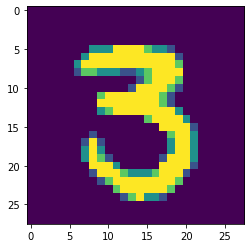

In [71]:
# random test
random_idx = np.random.randint(x_test.shape[0])
rx = x_test[random_idx] * 255
print(np.argmax(t_test[random_idx]))
rx = rx.reshape(28,28)
print(rx.shape)

from PIL import Image
from matplotlib.pyplot import imshow

imshow(Image.fromarray(np.uint8(rx)))

p = network.predict(x_test[random_idx])
print(np.argmax(p))